<a href="https://colab.research.google.com/github/wannleach/BIO-494/blob/main/ModuleG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 21 (Part 2): Numerical Integration**

*21.4: Simpson's Rule*


Simpson's Rule approximates integrals for a set of points by creating a unique polynomial that fits these points and then integrating said polynomial. On a basic level, this polynomial is created by making multiple Lagrange polynomials considering 3 points at a time: a center point and its two adjacent points. This polynomial is then summed over every two subintervals (as the Lagrange polynomials span over two subintervals each, the interval from left to center and center to right) and scaled by the step size (*h*) over the number of points to construct each section of the polynomial (3).

In [3]:
import numpy as np

# Parameters
a = 1                    # left boundary
b = 4                    # right boundary
n = 11                   # odd number of points
h = (b - a) / (n - 1)    # even step size
x = np.linspace(a, b, n) # x-values within boundary parameters
f = 5*x**2 - 8*x + 5     # function f values
exact_value = 60         # exact value of integral for comparison

# Compute the integral using Simpson's Rule (Lagrange polynomials)
I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = np.abs(exact_value - I_simp)

# Print the Simpson's Integral and its absolute error
print(I_simp)
print(err_simp)

60.39999999999999
0.3999999999999915


*21.5: Computing Integrals in Python*

Comparing the Trapezoid rule for estimating integrals with scipy's 'trapz' function, a similar algorithm.

In [6]:
import numpy as np
from scipy.integrate import trapz

# Parameters
a = 1                                                      # left boundary
b = 4                                                      # right boundary
n = 11                                                     # number of points
h = (b - a) / (n - 1)                                      # step size
x = np.linspace(a, b, n)                                   # x-values within boundary parameters
f = 5*x**2 - 8*x + 5                                       # function f values
exact_value = 60                                           # exact value of integral for comparison

# 'trapz' function from scipy compared to Trapezoid Rule estimation
I_trapz = trapz(f,x)                                       # scipy function
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])         # Trapezoid rule
I_trapz_error = np.abs(exact_value - I_trapz)              # scipy function absolute error
I_trap_error = np.abs(exact_value - I_trap)                # Trapezoid rule absolute error

# Print results
print("Scipy function result: " + str(I_trapz))            # scipy function result
print("Trapezoid rule result: " + str(I_trap))             # Trapezoid rule result
print("Scipy function error: " + str(I_trapz_error))       # scipy function absolute error
print("Trapezoid rule error: " + str(I_trap_error))        # Trapezoid rule absolute error

Scipy function result: 60.225
Trapezoid rule result: 60.224999999999994
Scipy function error: 0.22500000000000142
Trapezoid rule error: 0.22499999999999432


Comparing scipy's 'cumtrapz' function, an algorithm that approximates the cumulative integral of a function over a specified interval, to the exact algebraic integral.

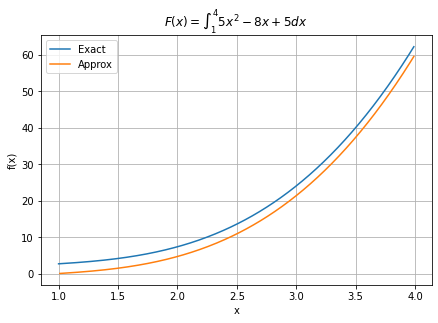

In [8]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

# Summarized Parameters
x = np.arange(1, 4, 0.01)                 # x-values over bounded interval [1,4] w/ step-size 0.1
F_exact = (5 / 3)*x**3 - 4*x**2 + 5*x     # exact integral                  
F_approx = cumtrapz(5*x**2 - 8*x + 5, x)  # approximate integral using scipy's 'cumtrapz' function (cumulative integral)

# Plot results
plt.figure();
plt.plot(x, F_exact);                     # exact integral
plt.plot(x[1::], F_approx);               # estimated integral 
plt.grid();
plt.tight_layout();
plt.title('$F(x) = \int_1^{4} 5x^2 - 8x + 5 dx$');
plt.xlabel('x');
plt.ylabel('f(x)');
plt.legend(['Exact', 'Approx']);
plt.show()

In [13]:
from scipy.integrate import quad 

# parameters
x = np.arange(1, 4, 0.01)                    # x-values over interval [1, 4] w/ step size 0.1
exact_value = 60                             # exact value of integral

# function definition
def poly_func(x):
  return (5*x**2 - 8*x + 5)

# Integral Computation
I_quad, est_err_quad = quad(poly_func, 1, 4) # approximate value of integral using 'quad' from scipy, estimated error
err_quad = exact_value - I_quad              # absolute error

# Print results and absolute error
print("Scipy Quad Approximation: " + str(I_quad))
print("Estimated Error from Quad, Absolute Error: " + str(est_err_quad), str(err_quad))

Scipy Quad Approximation: 60.0
Estimated Error from Quad, Absolute Error: 6.661338147750939e-13 0.0
